In [1]:
# if running without local install
import sys, os
sys.path.append(os.path.abspath(".."))

import GeoDataKit.geoplot as gp

import numpy as np

In [3]:
#data = np.array([[1,2,3],[3,5,7]])
n= 12
data = np.random.uniform(low=0,high=10,size=(2,n))

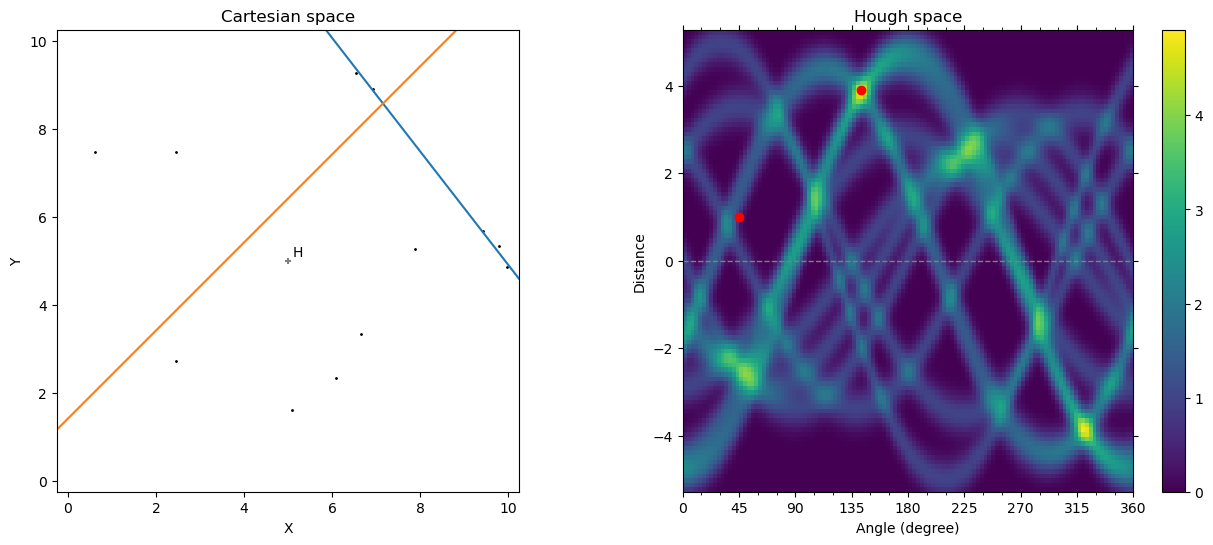

In [4]:
hgt = gp.HoughTransform(data,update_area=False)
#hgt.select_data_point(2)
hgt.hough.update_accumulator(kernel_type="gaussian",sigma=0.3)
hgp = gp.HoughPlot(hgt)
hgp.plot(show_selected=False,
         show_circle=True,show_hough_point=True,show_triangle=True,
                      show_vector=True)
hgp.plot_manual(az=45, dist = 1)

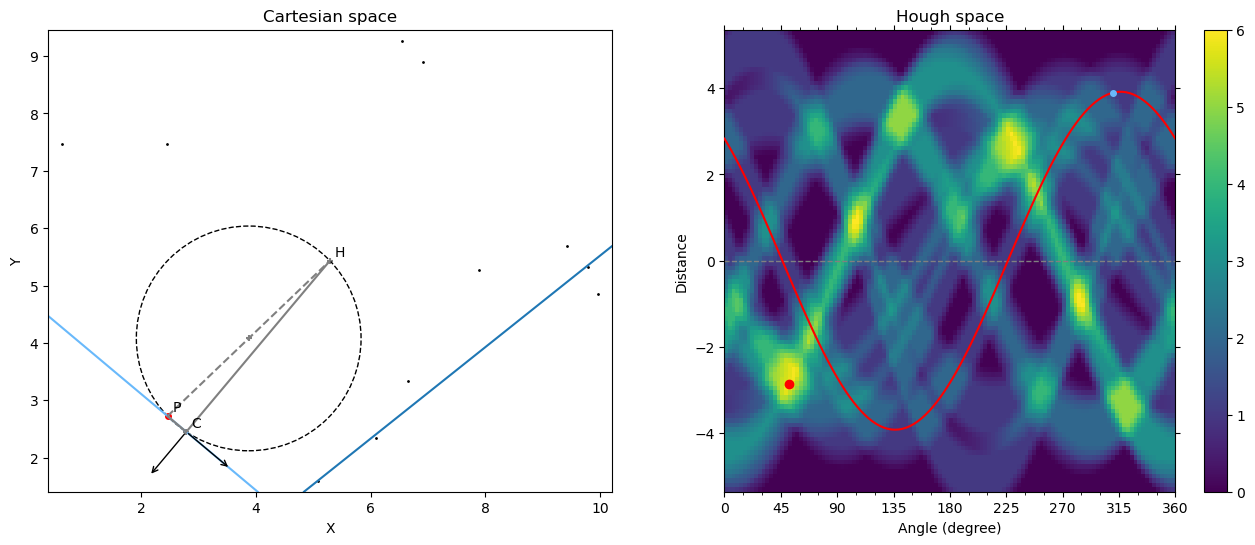

In [5]:
hgt = HoughTransform(data,update_area=True)
hgt.select_data_point(2)
#hgt.hough.update_accumulator(kernel_type="triangle",sigma=1,trunc=True,max=1)
hgt.hough.update_accumulator(kernel_type="line",antialiase= True,width=1)
hgp = HoughPlot(hgt)
hgp.plot(show_selected=True,index=2,az=310,
         show_circle=True,show_hough_point=True,show_triangle=True,
                      show_vector=True)

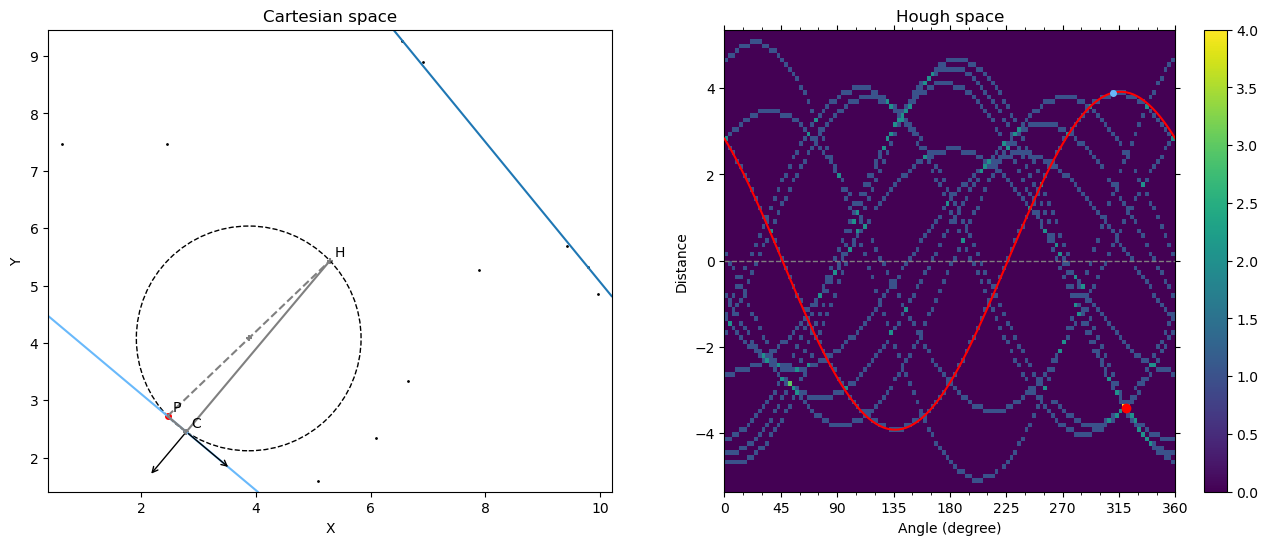

In [6]:
hgt = HoughTransform(data,update_area=True)
hgt.select_data_point(2)
#hgt.hough.update_accumulator(kernel_type="triangle",sigma=1,trunc=True,max=1)
hgt.hough.update_accumulator(kernel_type="line",antialiase= False)
hgp = HoughPlot(hgt)
hgp.plot(show_selected=True,index=2,az=310,
         show_circle=True,show_hough_point=True,show_triangle=True,
                      show_vector=True)

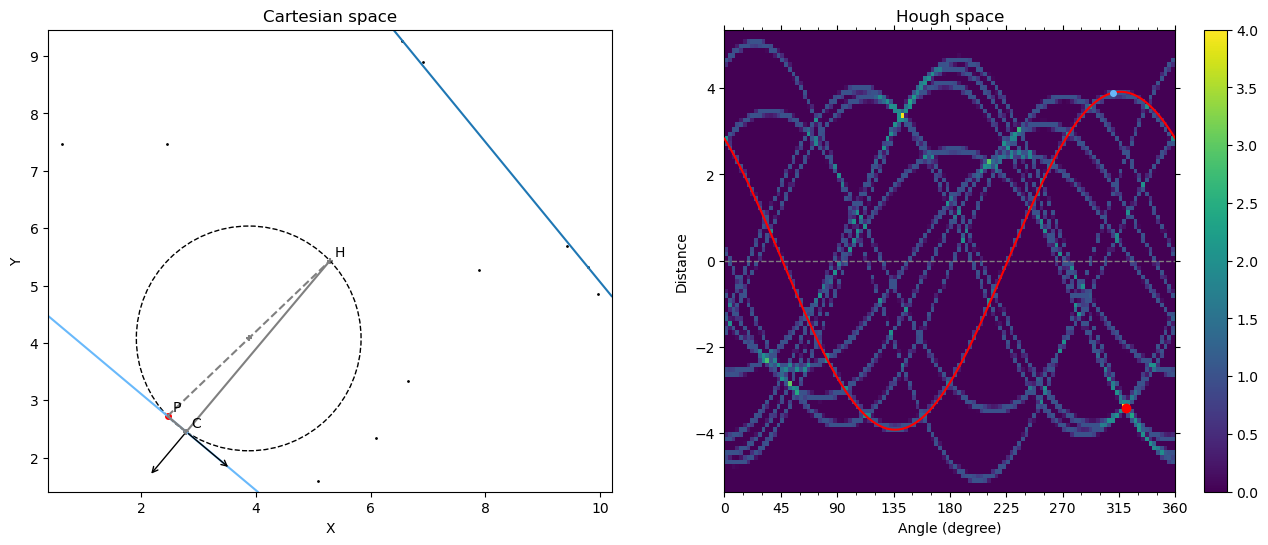

In [7]:
hgt = HoughTransform(data,update_area=True)
hgt.select_data_point(2)
#hgt.hough.update_accumulator(kernel_type="triangle",sigma=1,trunc=True,max=1)
hgt.hough.update_accumulator(kernel_type="line",antialiase= True)
hgp = HoughPlot(hgt)
hgp.plot(show_selected=True,index=2,az=310,
         show_circle=True,show_hough_point=True,show_triangle=True,
                      show_vector=True)

In [8]:

n= 10
data = np.random.uniform(low=0,high=10,size=(2,n))
hgt = HoughTransform(data,update_area=True)
@widgets.interact(
    hgt=widgets.fixed(hgt),
    selected_index = widgets.IntSlider(value=0,min=0,max=n,step=1,continuous_update=False),
    selected_azimuth = widgets.IntSlider(value=45,min=0,max=360,step=1,continuous_update=False),
    azimuth = widgets.IntSlider(value=45,min=0,max=360,step=1,continuous_update=False),
    dist = widgets.FloatSlider(value=0,min=-hgt.hough.distance_max,max=hgt.hough.distance_max,step=0.1,continuous_update=False),
    sigma = widgets.FloatSlider(value=0.5,min=0.1,max=3,step=0.1,continuous_update=False),
    kernel = kernel_dict.keys(),
    show_construction = [False,True]
)
def interact_hough(hgt,selected_index,selected_azimuth,azimuth,dist,sigma,kernel,show_construction):
    hgp = HoughPlot(hgt)
    hgt.hough.update_accumulator(kernel_type=kernel,sigma=sigma)
    hgp.plot(show_selected=True,index=selected_index,az=selected_azimuth,
            show_circle=show_construction, show_triangle=show_construction,
            show_hough_point=show_construction, show_vector=show_construction)
    hgp.plot_manual(azimuth,dist)

interactive(children=(IntSlider(value=0, continuous_update=False, description='selected_index', max=10), IntSl…

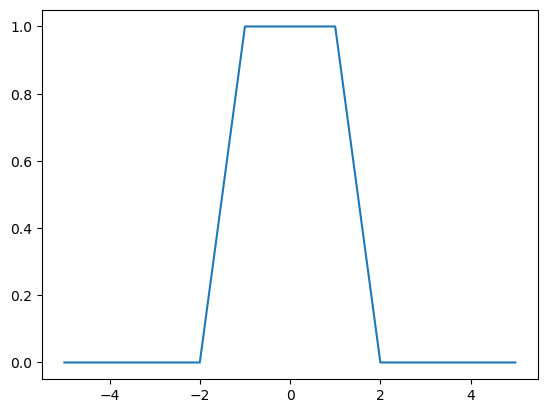

In [9]:
kernel = HoughKernel.kernel(type="line",width=2)
delta = np.arange(-5,5,0.01)
plt.plot(delta,kernel(delta))

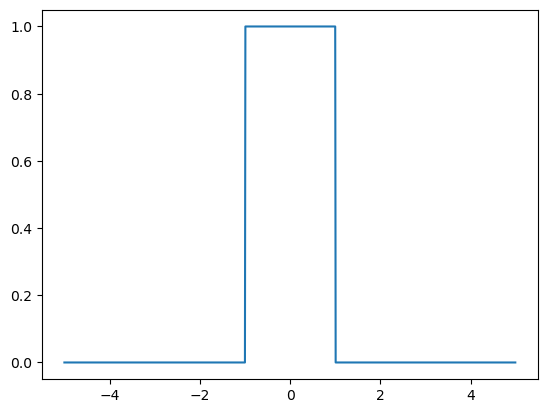

In [10]:
kernel = HoughKernel.kernel(type="line",width=2,antialiase=False)
delta = np.arange(-5,5,0.01)
plt.plot(delta,kernel(delta))

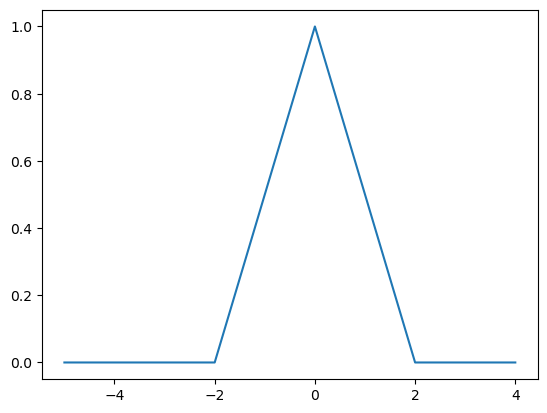

In [11]:
kernel = HoughKernel.kernel(type="triangle",sigma=2)
delta = np.arange(-5,5)
plt.plot(delta,kernel(delta))

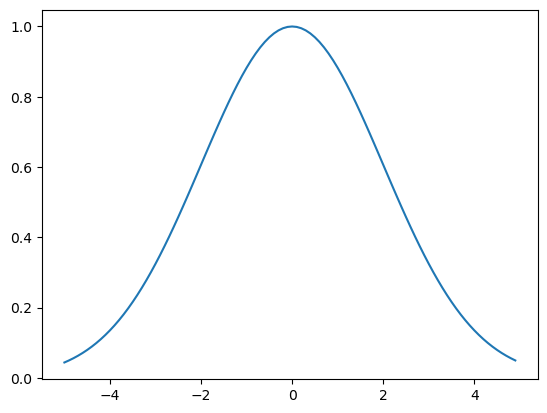

In [12]:
kernel = HoughKernel.kernel(type="gaussian",sigma=2)
delta = np.arange(-5,5,0.1)
plt.plot(delta,kernel(delta))